In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\geoit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Reading the data

In [2]:
df=pd.read_csv("data/SMS_train.csv",encoding = "ISO-8859-1",index_col="S. No.")
df.head()

,Message_body,Label
S. No.,,
1,Rofl. Its true to its name,Non-Spam
2,The guy did some bitching but I acted like i'd...,Non-Spam
3,"Pity, * was in mood for that. So...any other s...",Non-Spam
4,Will ü b going to esplanade fr home?,Non-Spam
5,This is the 2nd time we have tried 2 contact u...,Spam


### Defining the new column

In [3]:
def label_race (row):
   if row['Label'] == "Non-Spam" :
      return 0
   if row["Label"] == "Spam" :
      return 1
   return 0

In [4]:
df['label_number'] = df.apply (lambda row: label_race(row), axis=1)

In [5]:
df.head()

,Message_body,Label,label_number
S. No.,,,
1,Rofl. Its true to its name,Non-Spam,0
2,The guy did some bitching but I acted like i'd...,Non-Spam,0
3,"Pity, * was in mood for that. So...any other s...",Non-Spam,0
4,Will ü b going to esplanade fr home?,Non-Spam,0
5,This is the 2nd time we have tried 2 contact u...,Spam,1


In [6]:
df.shape

(957, 3)

In [7]:
df["Label"].value_counts()

Non-Spam    835
Spam        122
Name: Label, dtype: int64

There is decent amount of spam emails that will enable us to train our models.

## Count Plot


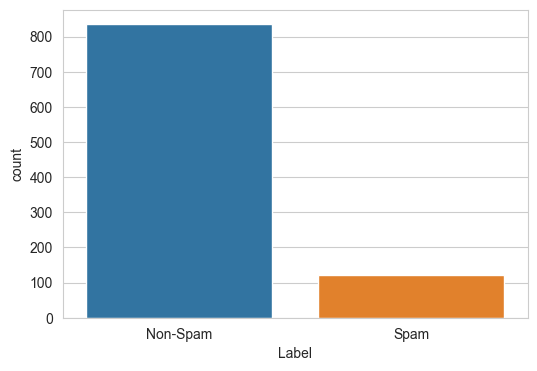

In [8]:
plt.figure(figsize = (6, 4))
sns.countplot(data = df, x = 'Label');

In [9]:
def count_words(text):
    words = word_tokenize(text)
    return len(text)
df['count']=df['Message_body'].apply(count_words)
df['count']

S. No.
1       26
2      125
3       57
4       36
5      160
      ... 
953    101
954     29
955     54
956     18
957     31
Name: count, Length: 957, dtype: int64

In [10]:
df.groupby('label_number')['count'].mean()

label_number
0     69.002395
1    140.508197
Name: count, dtype: float64

##### Spam messages have in general more words.

In [11]:
df


,Message_body,Label,label_number,count
S. No.,,,,
1,Rofl. Its true to its name,Non-Spam,0,26
2,The guy did some bitching but I acted like i'd...,Non-Spam,0,125
3,"Pity, * was in mood for that. So...any other s...",Non-Spam,0,57
4,Will ü b going to esplanade fr home?,Non-Spam,0,36
5,This is the 2nd time we have tried 2 contact u...,Spam,1,160
...,...,...,...,...
953,hows my favourite person today? r u workin har...,Non-Spam,0,101
954,How much you got for cleaning,Non-Spam,0,29
955,Sorry da. I gone mad so many pending works wha...,Non-Spam,0,54


In [12]:
X = df.loc[:, 'Message_body']
y = df.loc[:, 'label_number']

print(f"Shape of X: {X.shape}\nshape of y: {y.shape}")

Shape of X: (957,)
shape of y: (957,)


#### Split into Training data and Test data

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)


In [14]:
print(f"Training Data Shape: {X_train.shape}\nTest Data Shape: {X_test.shape}")

Training Data Shape: (765,)
Test Data Shape: (192,)


### Count Vectorization to Extract Features from Text

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
cv.fit(X_train)

CountVectorizer()

In [16]:
print('No.of Tokens: ',len(cv.vocabulary_.keys()))

No.of Tokens:  2782


In [17]:
dtv = cv.transform(X_train)
type(dtv)

scipy.sparse._csr.csr_matrix

In [18]:
dtv = dtv.toarray()

In [19]:
print(f"Number of Observations: {dtv.shape[0]}\nTokens/Features: {dtv.shape[1]}")

Number of Observations: 765
Tokens/Features: 2782


In [20]:
dtv[1]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Importing the different methods

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from time import perf_counter
import warnings
warnings.filterwarnings(action='ignore')


In [22]:
test_dtv = cv.transform(X_test)
test_dtv = test_dtv.toarray()

# Logistic Regression

In [23]:
%%time
lr = LogisticRegression(solver='liblinear', penalty ='l2' , C = 1.0)
lr.fit(dtv, y_train)
pred_lr = lr.predict(test_dtv)

CPU times: total: 46.9 ms
Wall time: 48.9 ms


In [24]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       168
           1       0.95      0.75      0.84        24

    accuracy                           0.96       192
   macro avg       0.96      0.87      0.91       192
weighted avg       0.96      0.96      0.96       192



# K Nearest Neighbours

In [25]:
%%time
knn = KNeighborsClassifier()
knn.fit(dtv, y_train)
pred_knn = knn.predict(test_dtv)

CPU times: total: 93.8 ms
Wall time: 78.2 ms


In [26]:
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       168
           1       1.00      0.12      0.22        24

    accuracy                           0.89       192
   macro avg       0.94      0.56      0.58       192
weighted avg       0.90      0.89      0.85       192



# Decision Tree Classifier

In [27]:
%%time
dtc = DecisionTreeClassifier()
dtc.fit(dtv, y_train)
pred_dtc = dtc.predict(test_dtv)

CPU times: total: 391 ms
Wall time: 425 ms


In [28]:
print(classification_report(y_test, pred_dtc))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       168
           1       0.74      0.71      0.72        24

    accuracy                           0.93       192
   macro avg       0.85      0.84      0.84       192
weighted avg       0.93      0.93      0.93       192



 # Support Vector Machine

In [29]:
%%time
lsvc = LinearSVC()
lsvc.fit(dtv, y_train)
pred_lsvc = lsvc.predict(test_dtv)

CPU times: total: 31.2 ms
Wall time: 78.7 ms


In [30]:
print(classification_report(y_test, pred_lsvc))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       168
           1       0.90      0.79      0.84        24

    accuracy                           0.96       192
   macro avg       0.94      0.89      0.91       192
weighted avg       0.96      0.96      0.96       192



In [31]:
%%time
svc = SVC()
svc.fit(dtv, y_train)
pred_svc = svc.predict(test_dtv)

CPU times: total: 875 ms
Wall time: 869 ms


In [32]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       168
           1       1.00      0.54      0.70        24

    accuracy                           0.94       192
   macro avg       0.97      0.77      0.84       192
weighted avg       0.95      0.94      0.94       192



# Random Forest Classifier

In [33]:
%%time
rfc = RandomForestClassifier()
rfc.fit(dtv, y_train)
pred_rfc = rfc.predict(test_dtv)

CPU times: total: 1.14 s
Wall time: 1.16 s


In [34]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       168
           1       0.94      0.62      0.75        24

    accuracy                           0.95       192
   macro avg       0.94      0.81      0.86       192
weighted avg       0.95      0.95      0.94       192



# Multinomial Naive Bayes

In [35]:
%%time
mnb = MultinomialNB()
mnb.fit(dtv, y_train)
pred_mnb = mnb.predict(test_dtv)

CPU times: total: 62.5 ms
Wall time: 38.9 ms


In [36]:
print(classification_report(y_test, pred_mnb))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       168
           1       0.91      0.88      0.89        24

    accuracy                           0.97       192
   macro avg       0.95      0.93      0.94       192
weighted avg       0.97      0.97      0.97       192



# Confusion Matrix

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay
import math

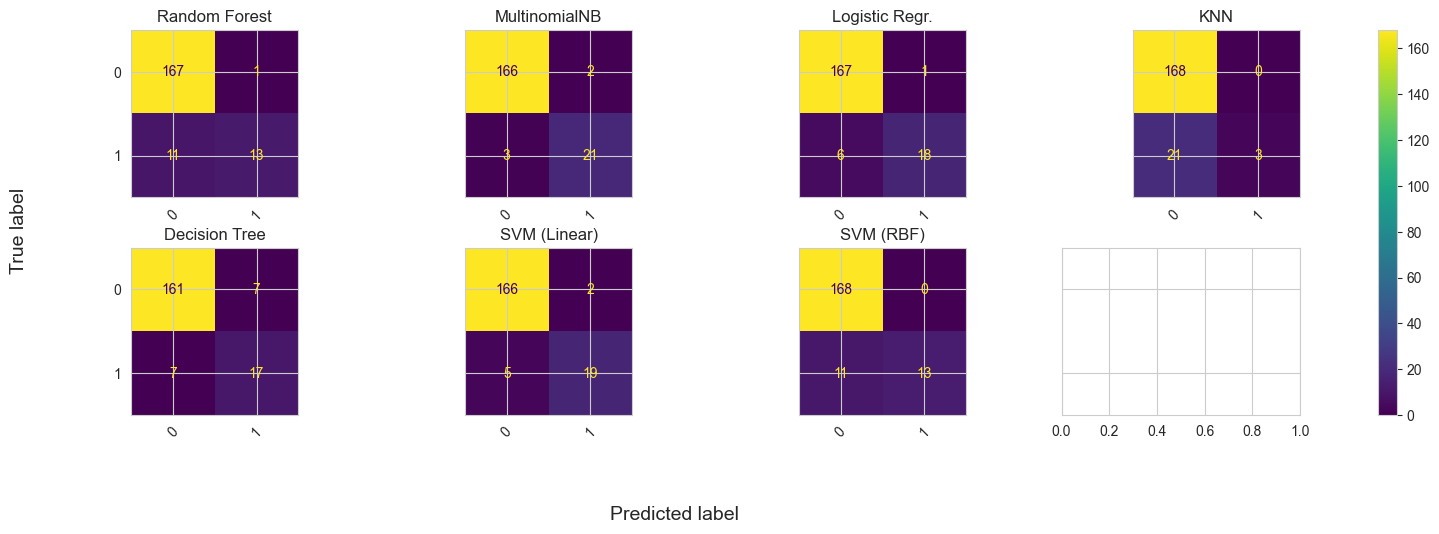

In [38]:
models = {
    "Random Forest": {"model":RandomForestClassifier(), "perf":0},
    "MultinomialNB": {"model":MultinomialNB(), "perf":0},
    "Logistic Regr.": {"model":LogisticRegression(solver='liblinear', penalty ='l2' , C = 1.0), "perf":0},
    "KNN": {"model":KNeighborsClassifier(), "perf":0},
    "Decision Tree": {"model":DecisionTreeClassifier(), "perf":0},
    "SVM (Linear)": {"model":LinearSVC(), "perf":0},
    "SVM (RBF)": {"model":SVC(), "perf":0}
}

f, axes = plt.subplots(2, 4, figsize=(20, 5), sharey='row')

for i, (key, classifier) in enumerate(models.items()):
    y_pred = classifier["model"].fit(dtv, y_train).predict(test_dtv)
    cf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cf_matrix)
    disp.plot(ax=axes[math.floor(i/4)][i-4*math.floor(i/4)], xticks_rotation=45)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    disp.ax_.set_ylabel('')
f.text(0.4, -0.1, 'Predicted label', ha='left',size=14)
f.text(0.1, 0.4, 'True label', ha='left',rotation='vertical',size=14)
plt.subplots_adjust(wspace=0.40, hspace=0.3)


f.colorbar(disp.im_, ax=axes)
plt.show()


## Training Time For The Algorithms

In [39]:
%%time
warnings.filterwarnings(action='ignore')

for name, model in models.items():
    start = perf_counter()
    model['model'].fit(dtv, y_train)
    duration = perf_counter() - start
    duration = round(duration,2)
    model["perf"] = duration
    print(f"{name:20} trained in {duration} sec")

Random Forest        trained in 1.17 sec
MultinomialNB        trained in 0.02 sec
Logistic Regr.       trained in 0.03 sec
KNN                  trained in 0.0 sec
Decision Tree        trained in 0.37 sec
SVM (Linear)         trained in 0.05 sec
SVM (RBF)            trained in 0.62 sec
CPU times: total: 2.22 s
Wall time: 2.26 s


In [40]:
test_dtv = cv.transform(X_test)
test_dtv = test_dtv.toarray()

In [41]:
models_accuracy = []
for name, model in models.items():
    models_accuracy.append([name, model["model"].score(test_dtv, y_test),model["perf"]])

In [42]:
df_accuracy = pd.DataFrame(models_accuracy)
df_accuracy.columns = ['Model', 'Test Accuracy', 'Training time (sec)']
df_accuracy.sort_values(by = 'Test Accuracy', ascending = False, inplace=True)
df_accuracy.reset_index(drop = True, inplace=True)
df_accuracy

,Model,Test Accuracy,Training time (sec)
0,MultinomialNB,0.973958,0.02
1,Logistic Regr.,0.963542,0.03
2,SVM (Linear),0.963542,0.05
3,Random Forest,0.942708,1.17
4,SVM (RBF),0.942708,0.62
5,Decision Tree,0.927083,0.37
6,KNN,0.890625,0.00


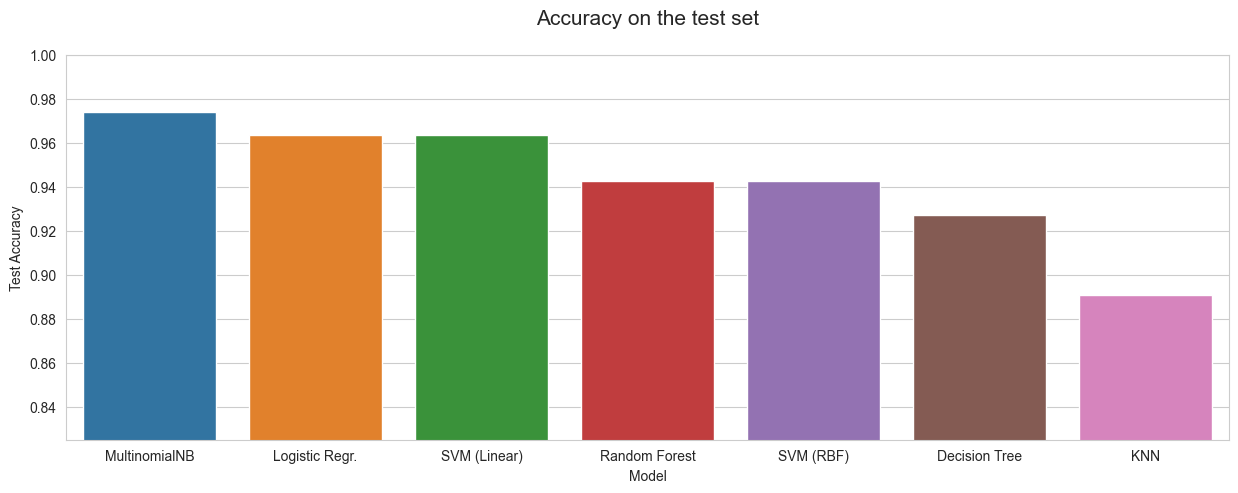

In [43]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'Model', y ='Test Accuracy', data = df_accuracy)
plt.title('Accuracy on the test set\n', fontsize = 15)
plt.ylim(0.825,1)
plt.show()

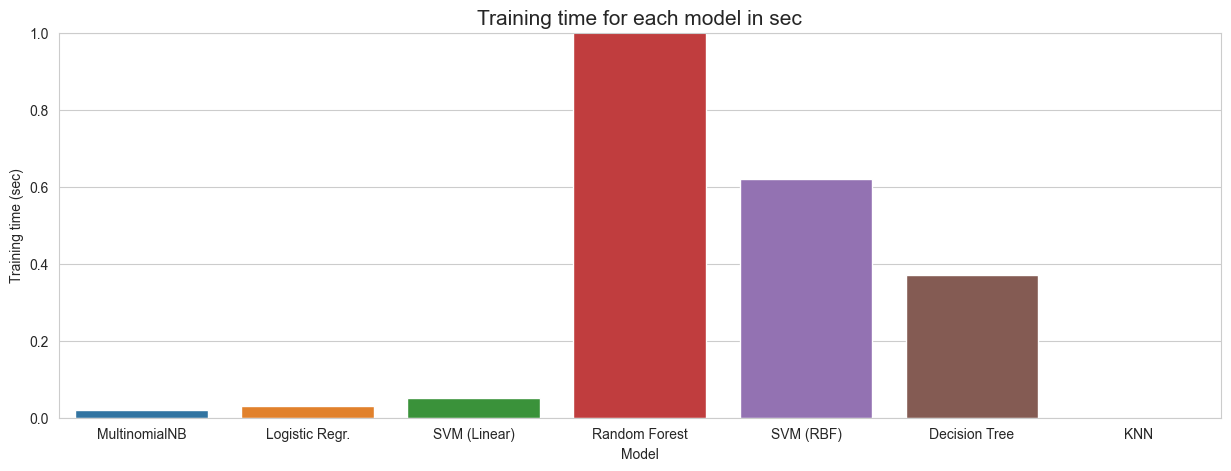

In [44]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'Model', y = 'Training time (sec)', data = df_accuracy)
plt.title('Training time for each model in sec', fontsize = 15)
plt.ylim(0,1)
plt.show()